In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bikeData.txt")
df = pd.DataFrame(data)

In [3]:
pd.set_option('display.max_columns', None)

# Summary of Data

In [4]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [5]:
df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


# Data Cleaning & Information for Data

In [7]:
df['Month'] = df['Month'].astype('str')

In [8]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [9]:
df['Customer_Age'].agg(['mean', 'std', 'sum'])

mean    3.591921e+01
std     1.102194e+01
sum     4.060164e+06
Name: Customer_Age, dtype: float64

In [10]:
df.shape

(113036, 18)

In [11]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# Add new column *Seasons* & *Clean_Profit*.

In [12]:
df['Seasons'] = df['Month'].apply(lambda month : 'Winter' if month in ['December', 'January', 'February'] else 'Spring' if month in ['March', 'April', 'May'] else 'Summer' if month in ['June', 'July', 'August'] else 'Fall')

In [13]:
df['Clean_Profit'] = (df['Unit_Price'] * df['Order_Quantity']) - (df['Unit_Cost'] * df['Order_Quantity'])

In [14]:
df['Customer_Gender'] = df['Customer_Gender'].replace('F', 'Female')

In [15]:
df['Customer_Gender'] = df['Customer_Gender'].replace('M', 'Male')

In [16]:
df.drop('Date', axis = 1, inplace = True)

In [ ]:
df.groupby(['Country', 'State'])['Unit_Cost', 'Unit_Price', 'Clean_Profit'].mean()

> Temporary DataFrames

In [16]:
def year_loc(df, year):
    return df.loc[df['Year'] == year]

In [17]:
df2011 = year_loc(df, 2011)
df2012 = year_loc(df, 2012)
df2013 = year_loc(df, 2013)
df2014 = year_loc(df, 2014)
df2015 = year_loc(df, 2015)
df2016 = year_loc(df, 2016)
df2017 = year_loc(df, 2017)

In [19]:
def get_clean_Profit(df, category, year):
    return df.loc[(df['Year'] == year) & (df['Product_Category'] == category), 'Clean_Profit'].sum()

bikes_sum = []
clothing_sum = []
acc_sum = []

for x in range(2011, 2017):
    bikes_sum.append(get_clean_Profit(df,'Bikes', x))
    clothing_sum.append(get_clean_Profit(df, 'Clothing', x))
    acc_sum.append(get_clean_Profit(df,'Accessories', x))

In [20]:
def get_order(df, category, year):
        return df.loc[(df['Year'] == year) & (df['Product_Category'] == category), 'Order_Quantity'].sum()

bikes_sum_order = []
clothing_sum_order = []
acc_sum_order = []

for x in range(2011, 2017):
    bikes_sum_order.append(get_order(df,'Bikes', x))
    clothing_sum_order.append(get_order(df, 'Clothing', x))
    acc_sum_order.append(get_order(df,'Accessories', x))

In [21]:
years = [2011, 2012, 2013, 2014, 2015, 2016]

In [22]:
bikes_df = {
    'Year' : years,
    'Summary' : bikes_sum,
    'Order' : bikes_sum_order
}
bikes = pd.DataFrame(bikes_df)

In [23]:
clothing_df = {
    'Year' : years,
    'Summary' : clothing_sum,
    'Order' : clothing_sum_order
}
clothing = pd.DataFrame(clothing_df)

In [24]:
acc_df = {
    'Year' : years,
    'Summary' : acc_sum,
    'Order' : acc_sum_order
}
accessories = pd.DataFrame(acc_df)

*Visualization*

In [26]:
def plt_function(xname, yname, titl):
    plt.figure(figsize = (12,6), layout = 'constrained')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(titl)

def multiple_plt_function(xxname, yyname, titll):
    plt.xlabel(xxname)
    plt.ylabel(yyname)
    plt.title(titll)

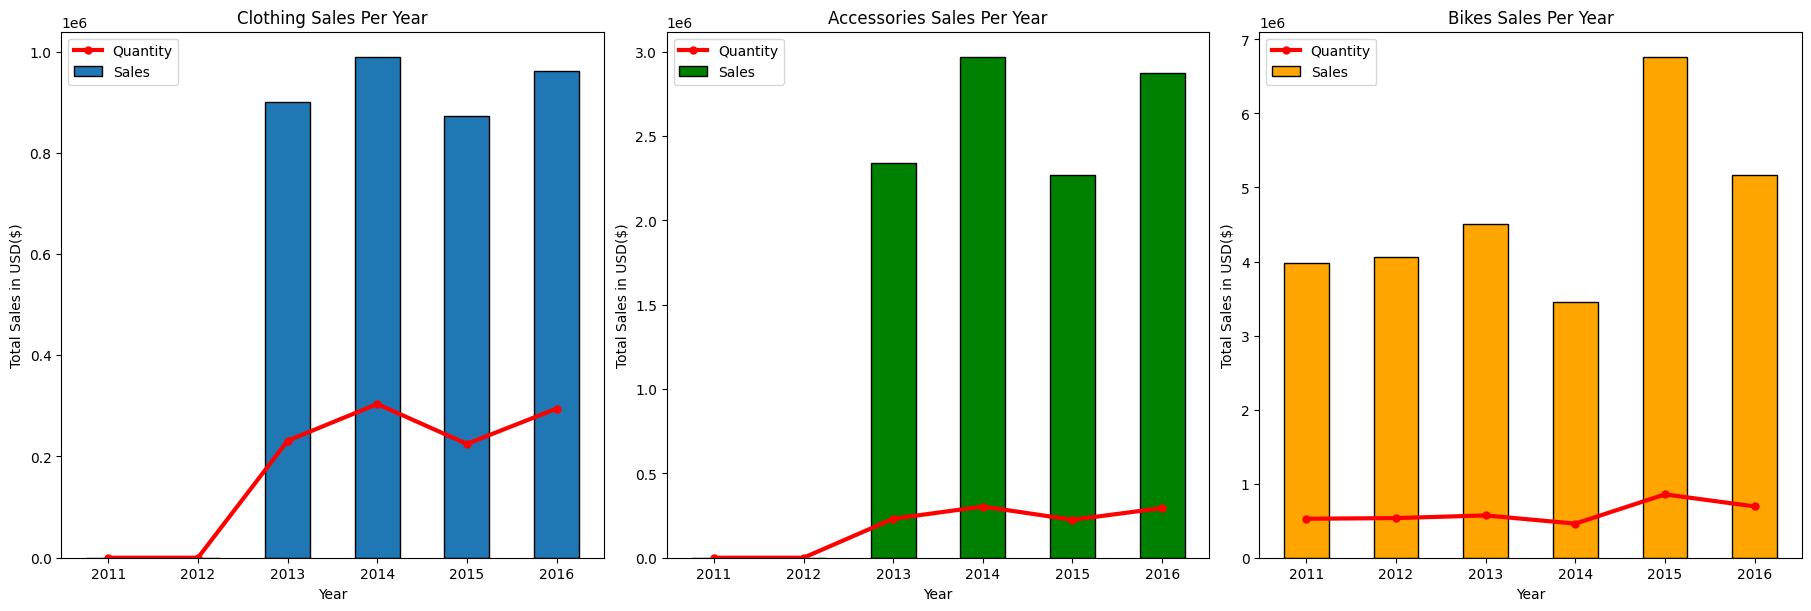

In [112]:
plt.figure(figsize = (18,6), facecolor = 'white', layout = 'constrained')

plt.subplot(131)
plt.bar(clothing['Year'], clothing['Summary'], width = 0.5, edgecolor = 'Black')
plt.plot(accessories['Year'], accessories['Order'], linewidth = 3, marker = 'o', markersize = 5, color = 'red')
multiple_plt_function('Year', 'Total Sales in USD($)', 'Clothing Sales Per Year')
plt.legend(['Quantity', 'Sales'])

plt.subplot(132)
plt.bar(accessories['Year'], accessories['Summary'],width= 0.5, color = 'green', edgecolor = 'Black')
plt.plot(accessories['Year'], accessories['Order'], linewidth = 3, marker = 'o', markersize = 5, color = 'red')
multiple_plt_function('Year', 'Total Sales in USD($)', 'Accessories Sales Per Year')
plt.legend(['Quantity', 'Sales'])

plt.subplot(133)
plt.bar(bikes['Year'], bikes['Summary'], width = 0.5, color = 'orange', edgecolor = 'Black')
plt.plot(bikes['Year'], bikes['Order'] * 100, linewidth = 3, marker = 'o', markersize = 5, color = 'red')

multiple_plt_function('Year', 'Total Sales in USD($)', 'Bikes Sales Per Year')
plt.legend(['Quantity', 'Sales'])

In [28]:
pivot_table = df.pivot_table(index = 'Year', columns = 'Product_Category',values = 'Order_Quantity', aggfunc = 'mean')
print(pivot_table)

Product_Category  Accessories     Bikes   Clothing
Year                                              
2011                      NaN  1.964886        NaN
2012                      NaN  2.000000        NaN
2013                15.383827  1.000000  15.624326
2014                15.155378  1.000000  14.991175
2015                14.964393  1.498424  15.135113
2016                14.701373  1.504561  14.571128


In [29]:
grouped_products = df.groupby(by = 'Product_Category')
sum_grouped_products = grouped_products['Clean_Profit'].apply(lambda x : x.sum())

Text(0, 0.5, 'Products')

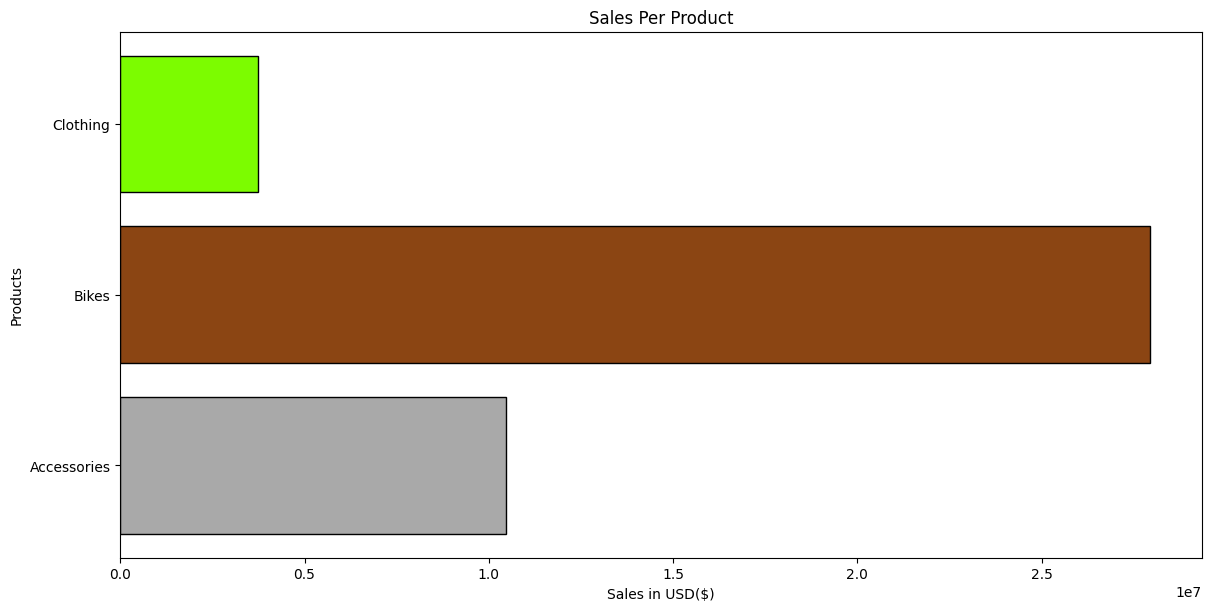

In [30]:
plt.figure(figsize = (12,6), layout = 'constrained')

plt.barh(sum_grouped_products.index, sum_grouped_products, edgecolor = 'black', color = ['darkgrey', 'saddlebrown', 'lawngreen'])

plt.title('Sales Per Product')
plt.xlabel('Sales in USD($)')
plt.ylabel('Products')

In [31]:
age_grouped = df.groupby(by = 'Age_Group')[['Order_Quantity', 'Profit']].sum()

In [32]:
age_grouped

,Order_Quantity,Profit
Age_Group,,
Adults (35-64),672417,16321582
Seniors (64+),9877,138165
Young Adults (25-34),446875,11386761
Youth (<25),216147,4374592


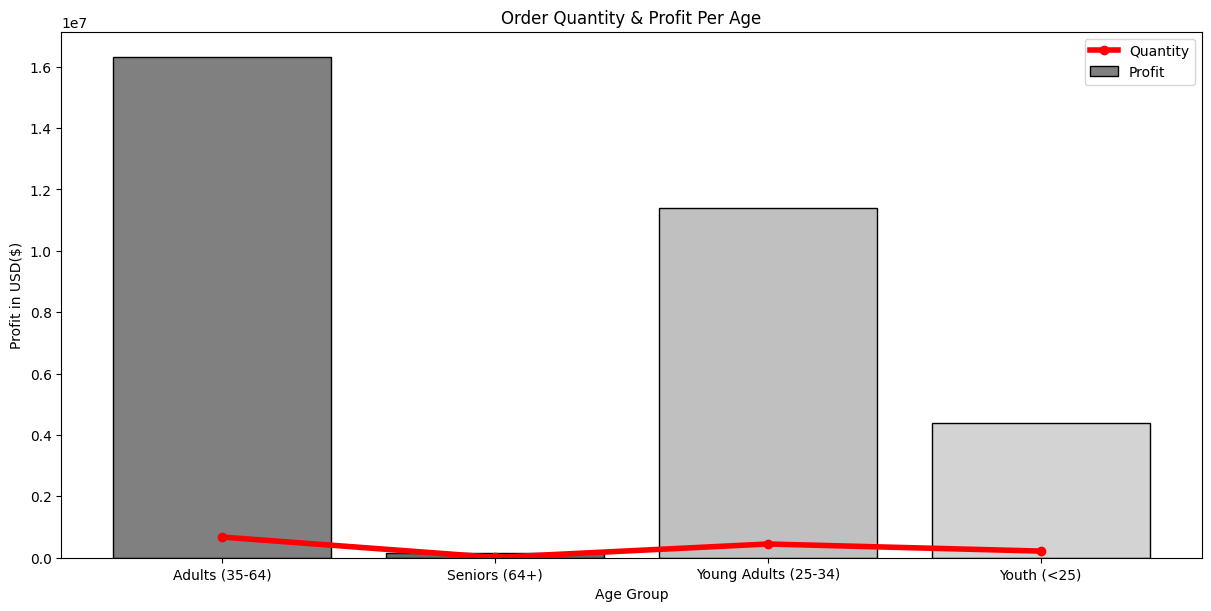

In [48]:
plt_function('Age Group', 'Profit in USD($)', 'Order Quantity & Profit Per Age')

plt.bar(age_grouped.index, age_grouped['Profit'], color = ['grey', 'dimgrey', 'silver', 'lightgrey'], edgecolor = 'Black', label = 'Profit')

plt.plot(age_grouped.index, age_grouped['Order_Quantity'], color = 'red', linewidth = 4, label = 'Quantity', marker = 'o')

plt.legend()

TODO: Countries


In [43]:
grouped_country = df.groupby(by = 'Country')
gc = grouped_country['Clean_Profit'].apply(lambda  cou : cou.sum())

<BarContainer object of 6 artists>

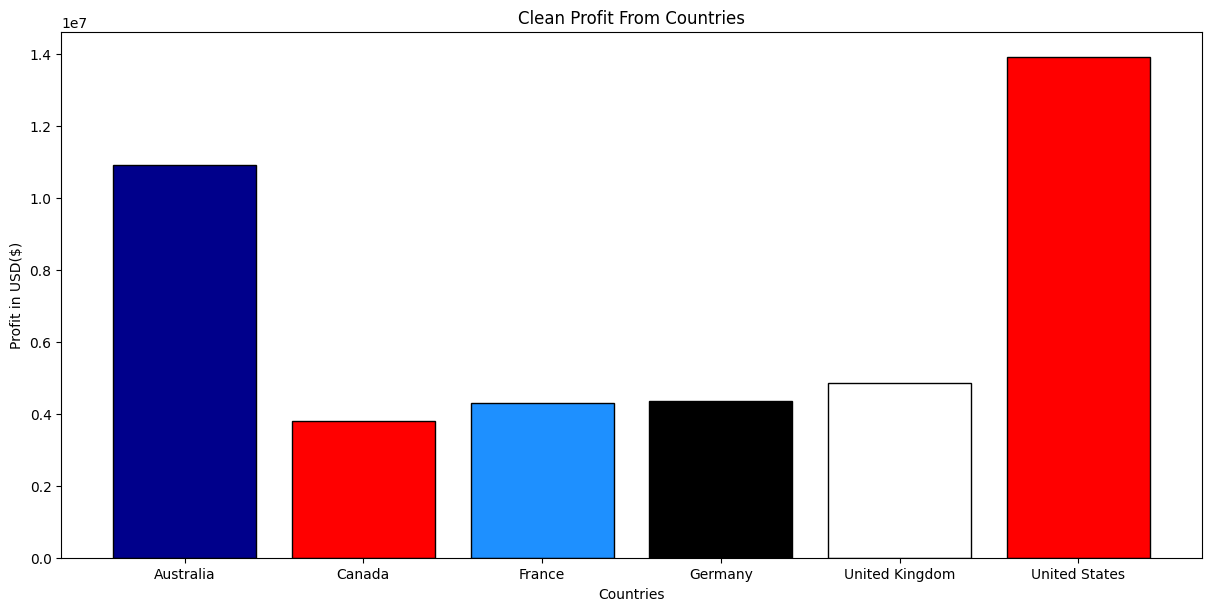

In [66]:
plt_function('Countries', 'Profit in USD($)', 'Clean Profit From Countries')

plt.bar(gc.index, gc, color = ['darkblue', 'red', 'dodgerblue', 'black', 'white', 'red'], edgecolor = 'Black')


- Best Selling Product

In [62]:
df['Product'].loc[df['Product'].value_counts().max()]

'Water Bottle - 30 oz.'

- Top 10 Selling Products

In [100]:
grouped_proproduct = df.groupby('Product')['Order_Quantity'].sum()
grouped_proproduct = pd.DataFrame(grouped_proproduct)
top_10_products = grouped_proproduct.sort_values('Order_Quantity', ascending= False).head(10)
top_10_products

,Order_Quantity
Product,
Water Bottle - 30 oz.,164086
Patch Kit/8 Patches,157583
Mountain Tire Tube,102792
AWC Logo Cap,67316
"Sport-100 Helmet, Red",63663
Road Tire Tube,62296
Fender Set - Mountain,62118
"Sport-100 Helmet, Black",62105
Touring Tire Tube,56802


- Low 10 Selling Products

In [104]:
low_10_products = grouped_proproduct.sort_values('Order_Quantity', ascending= True).head(10)
low_10_products

,Order_Quantity
Product,
"Mountain-500 Black, 52",40
"Mountain-500 Silver, 48",52
"Road-650 Red, 52",52
"Touring-3000 Blue, 50",70
"Mountain-100 Black, 42",73
"Mountain-100 Silver, 48",75
"Mountain-100 Silver, 42",77
"Mountain-100 Silver, 44",83
"Touring-3000 Yellow, 62",83


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Mountain-500 Black, 52'),
  Text(1, 0, 'Mountain-500 Silver, 48'),
  Text(2, 0, 'Road-650 Red, 52'),
  Text(3, 0, 'Touring-3000 Blue, 50'),
  Text(4, 0, 'Mountain-100 Black, 42'),
  Text(5, 0, 'Mountain-100 Silver, 48'),
  Text(6, 0, 'Mountain-100 Silver, 42'),
  Text(7, 0, 'Mountain-100 Silver, 44'),
  Text(8, 0, 'Touring-3000 Yellow, 62'),
  Text(9, 0, 'Mountain-100 Black, 38')])

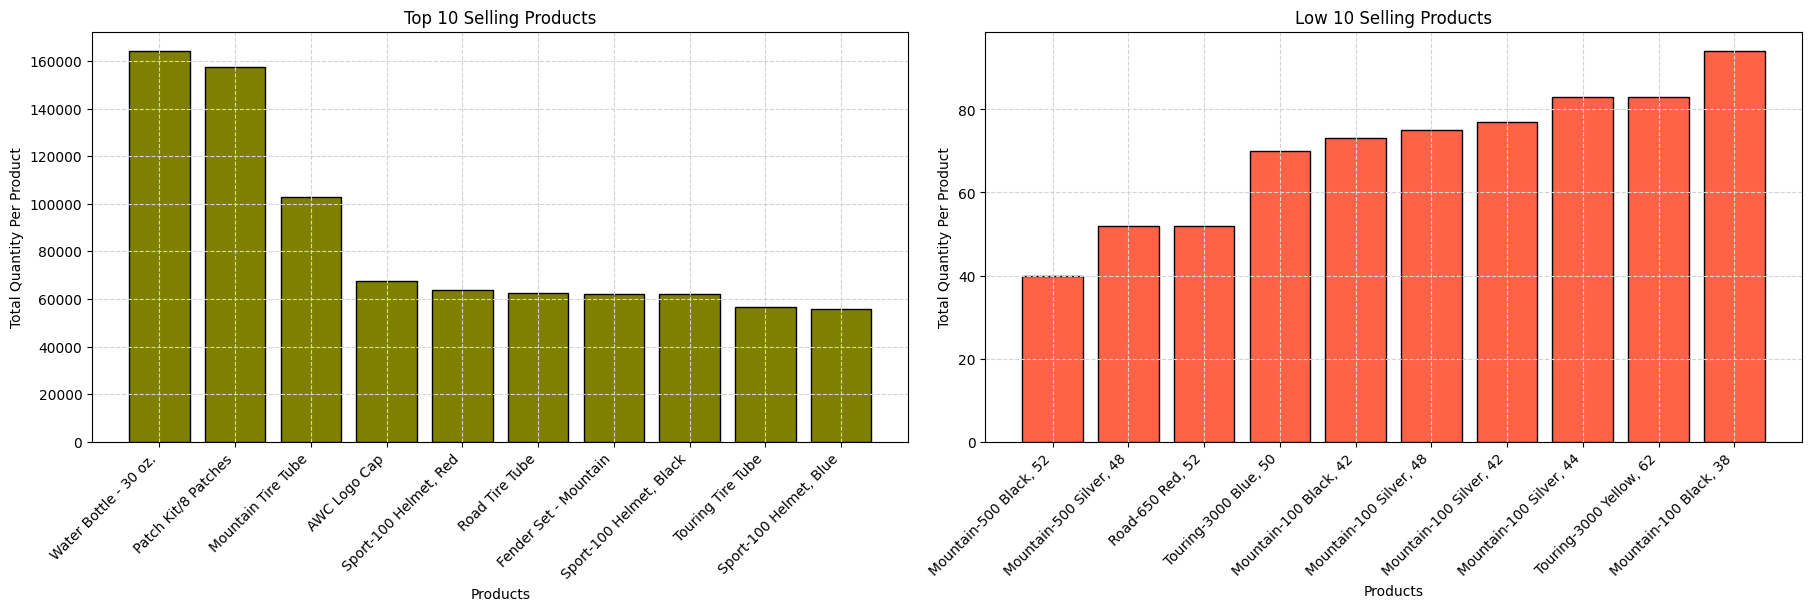

In [109]:
plt.figure(figsize = (18,6), facecolor = 'white', layout = 'constrained')

plt.subplot(121)
plt.bar(top_10_products.index, top_10_products.Order_Quantity, edgecolor = 'Black', color = 'olive')
multiple_plt_function('Products', 'Total Quantity Per Product', 'Top 10 Selling Products')
plt.grid(color = 'lightgrey', linestyle = '--')
plt.xticks(rotation = 45, ha = 'right')

plt.subplot(122)
plt.bar(low_10_products.index, low_10_products.Order_Quantity, edgecolor = 'Black', color = 'tomato')
multiple_plt_function('Products', 'Total Quantity Per Product', 'Low 10 Selling Products')
plt.grid(color = 'lightgrey', linestyle = '--')
plt.xticks(rotation = 45, ha = 'right')